## Loading the csv file and making some changes and verifications

In [143]:
import pandas as pd

In [144]:
# load the dataset mushroom, where the objective is predict whether a mushroom is poisonous or not ("class" column)
dataset = pd.read_csv('./dataset/mushroom_cleaned.csv')
dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [145]:
# change the name "class" to "poisonous"
dataset.rename(columns={'class':'poisonous'}, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   poisonous        54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [146]:
### TO - DO
# Fazer uns gráficos mostrando como os valores de cada parâmetro se distribui
# Se for possível fazer esses valores em relação a ser ou não venenoso

In [147]:
# see if there are any null values
dataset.isnull().sum(axis=0)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
poisonous          0
dtype: int64

## Making the tests and predictions

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
import time

In [149]:
labels = dataset.poisonous
dataframe = dataset.drop('poisonous',inplace=False, axis=1)

In [150]:
# separating the data in 2 groups (training and testing), the test group will have 10% of the data
train, test, res_train, res_test = train_test_split(dataframe, labels, test_size=0.1, random_state=42)

In [151]:
algorithm = ['DT', 'KNN', 'RL', 'RF']

predict_values = [0, 0, 0, 0]
predict_probabilities = [0, 0, 0, 0]
metrics = [0, 0, 0, 0]
exec_time = [0, 0, 0, 0]

In [152]:
def model_prediction(model):

    start_time = time.time()
    model.fit(train, res_train)
    end_time = time.time()

    predict = model.predict(test)
    predict_proba = model.predict_proba(test)
    acc = accuracy_score(res_test, predict)
    return (end_time - start_time), predict, predict_proba, acc

### Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [154]:
tree = DecisionTreeClassifier()
# tree.get_params()

In [155]:
exec_time[0], predict_values[0], predict_probabilities[0], metrics[0] = model_prediction(tree)
metrics[0]

0.975018504811251

In [156]:
# plotar a arvore de decisão em pdf para melhor visualização
labels_name = ['0', '1']
graph_date = export_graphviz(tree, feature_names=dataframe.columns, class_names=labels_name, filled=True)
graph = graphviz.Source(graph_date.replace(' fillcolor="#399de5"', ' fillcolor="#399de5", shape="diamond"'))
# graph.render('decision_tree')

# interpretação dos nós da arvore
# +-----------------+
# |  atributo <= ?  | # indica qual atribulo foi selecionado por ter maior ganho de informação e a valor que melhor divide o dataset com base nesse atributo (se verdadeiro vai pra esquerda se falso direita)
# |    gini = ?     | # nivel de impureza do atributo com base na classe
# |   samples = ?   | # quantidade de exemplos dos dados de treino utilizado na analise desse nó
# | values = [ ?]?, | # quantidade de exemplos por classe
# |    class = ?    | # qual a classe se a analise parar nesse nó (selecionado com base na classe com maior número de exemplo (classe majoritária))
# +-----------------+

### K-Nearest Neighbors (KNN)

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
neighbors = KNeighborsClassifier(n_neighbors=10)
# neighbors.get_params()

In [159]:
exec_time[1], predict_values[1], predict_probabilities[1], metrics[1] = model_prediction(neighbors)
metrics[1]

0.7148408586232421

### Regressão Logística

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logreg = LogisticRegression(max_iter=1000)
# logreg.get_params()

In [162]:
exec_time[2], predict_values[2], predict_probabilities[2], metrics[2] = model_prediction(logreg)
metrics[2]

0.6437823834196891

### Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.get_params()

In [165]:
exec_time[3], predict_values[3], predict_probabilities[3], metrics[3] = model_prediction(random_forest)
metrics[3]

0.9918578830495929

In [166]:
metrics

[0.975018504811251, 0.7148408586232421, 0.6437823834196891, 0.9918578830495929]

### Support Vector Machine (SVM)

Iniviavel rodar, super lento

## Make some differents evalutions

In [167]:
from sklearn.metrics import confusion_matrix

for i in range(4):
    print(algorithm[i])
    print(confusion_matrix(res_test, predict_values[i]), end='\n\n\n')

# mostra em forma de matriz, quantos deram (1,1), (1,0) (0,1), (0,0)
# (0,0)   (0,1)
# (1,0)   (1,1)
# PODE OLHAR SE TA TENDO MAIS FALSO POSITIVO OU FALSO NEGATIVO

DT
[[2364   78]
 [  57 2905]]


KNN
[[1846  596]
 [ 945 2017]]


RL
[[1331 1111]
 [ 814 2148]]


RF
[[2413   29]
 [  15 2947]]




In [168]:
from sklearn.metrics import classification_report

for i in range(4):
    print(algorithm[i])
    print(classification_report(res_test, predict_values[i], target_names=['0', '1'], digits=5), end='\n\n' + '-'*60 + '\n\n')


DT
              precision    recall  f1-score   support

           0    0.97646   0.96806   0.97224      2442
           1    0.97385   0.98076   0.97729      2962

    accuracy                        0.97502      5404
   macro avg    0.97515   0.97441   0.97477      5404
weighted avg    0.97503   0.97502   0.97501      5404


------------------------------------------------------------

KNN
              precision    recall  f1-score   support

           0    0.66141   0.75594   0.70552      2442
           1    0.77191   0.68096   0.72359      2962

    accuracy                        0.71484      5404
   macro avg    0.71666   0.71845   0.71456      5404
weighted avg    0.72198   0.71484   0.71542      5404


------------------------------------------------------------

RL
              precision    recall  f1-score   support

           0    0.62051   0.54505   0.58034      2442
           1    0.65910   0.72519   0.69056      2962

    accuracy                        0.64378   

In [169]:
metrics

[0.975018504811251, 0.7148408586232421, 0.6437823834196891, 0.9918578830495929]

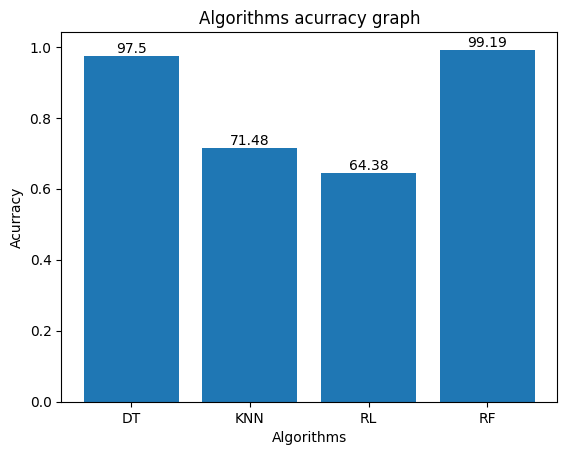

In [170]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bars = ax.bar(algorithm, metrics)

for bar in bars:
    height = bar.get_height()
    rounded_height = round(height*100, 2)
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{rounded_height}', ha='center', va='bottom')

plt.title('Algorithms acurracy graph')
plt.xlabel('Algorithms')
plt.ylabel('Acurracy')

plt.show()

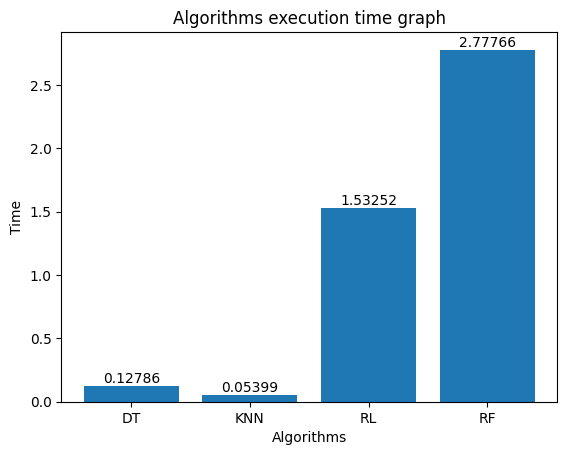

In [171]:
fig, ax = plt.subplots()
bars = ax.bar(algorithm, exec_time)

for bar in bars:
    height = bar.get_height()
    rounded_height = round(height, 5)
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{rounded_height}', ha='center', va='bottom')

plt.title('Algorithms execution time graph')
plt.xlabel('Algorithms')
plt.ylabel('Time')

plt.show()

## Cross Validation

In [172]:
from sklearn.model_selection import StratifiedKFold

alg_runner = {
    'decision_tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'log_reg': LogisticRegression(max_iter=1000),
    'random_forest': RandomForestClassifier(n_estimators=100)
}

labels = dataset.poisonous
dataframe = dataset.drop('poisonous',inplace=False, axis=1)

In [173]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [174]:
results = []

for fold, (train_index, test_index) in enumerate(kf.split(dataframe, labels)):
    cv_train = dataframe.iloc[train_index]
    cv_train_labels = labels.iloc[train_index]

    cv_test = dataframe.iloc[test_index]
    cv_test_labels = labels.iloc[test_index]

    for alg_name, alg_run in alg_runner.items():
        alg_run.fit(cv_train, cv_train_labels)
        predict = alg_run.predict(cv_test)
        acc = accuracy_score(cv_test_labels, predict)
        results.append([alg_name, fold, acc])

df_results = pd.DataFrame(results, columns=['algorithm', 'fold', 'accuracy']) 
df_results

,algorithm,fold,accuracy
0,decision_tree,0,0.976127
1,KNN,0,0.708060
2,log_reg,0,0.633108
3,random_forest,0,0.989266
4,decision_tree,1,0.978903
5,KNN,1,0.707227
6,log_reg,1,0.636162
7,random_forest,1,0.990747
8,decision_tree,2,0.978347
9,KNN,2,0.710651


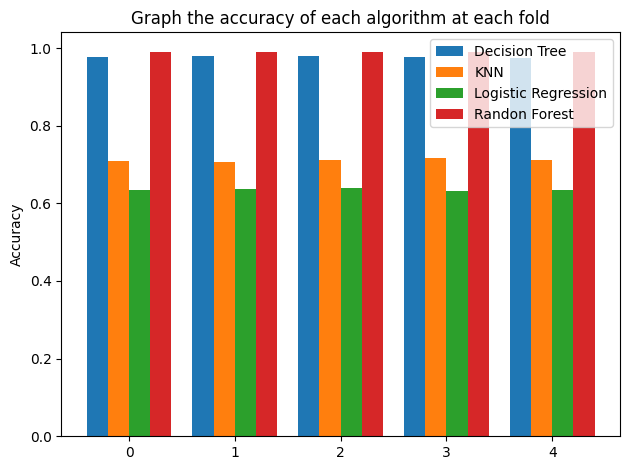

In [175]:
import matplotlib.pyplot as plt
import numpy as np

x_labels = list(set([data[1] for data in results]))
data1 = [data[2] for data in results if data[0] == 'decision_tree']
data2 = [data[2] for data in results if data[0] == 'KNN']
data3 = [data[2] for data in results if data[0] == 'log_reg']
data4 = [data[2] for data in results if data[0] == 'random_forest']

x = np.arange(len(x_labels))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - 1.5*width, data1, width, label='Decision Tree')
rects2 = ax.bar(x - 0.5*width, data2, width, label='KNN')
rects3 = ax.bar(x + 0.5*width, data3, width, label='Logistic Regression')
rects4 = ax.bar(x + 1.5*width, data4, width, label='Randon Forest')

ax.set_ylabel('Accuracy')
ax.set_title('Graph the accuracy of each algorithm at each fold')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)

fig.tight_layout()
plt.show()


Esse gráfico mostra que não está havendo overfitting dos modelos aos dados da dataset

## Making some insights

<Axes: >

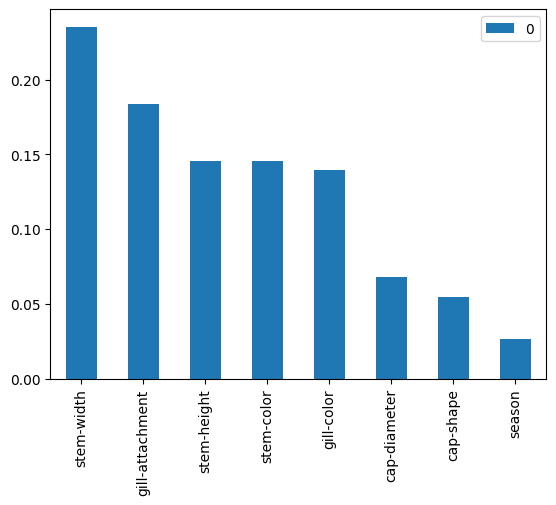

In [176]:
# plot the importance of each parameter in the training
feature_importance = pd.DataFrame(tree.feature_importances_, index=dataframe.columns).sort_values(0, ascending=False)
feature_importance.plot(kind='bar')